In [1]:
#Importing all Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading the data from CSV File
data = pd.read_csv('heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
#Checking all the columns in the dataset
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [4]:
#Plotting the number of Male and Female
data['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [5]:
#Checking all the NA values
data.columns.isna()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [6]:
#Checking the number of target values
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [7]:
#Splitting the data into Continuous and Categorial values
categorical_val = []
continous_val = []
for column in data.columns:
    print('==============================')
    print(f"{column} : {data[column].unique()}")
    if len(data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex : [1 0]
cp : [3 2 1 0]
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs :

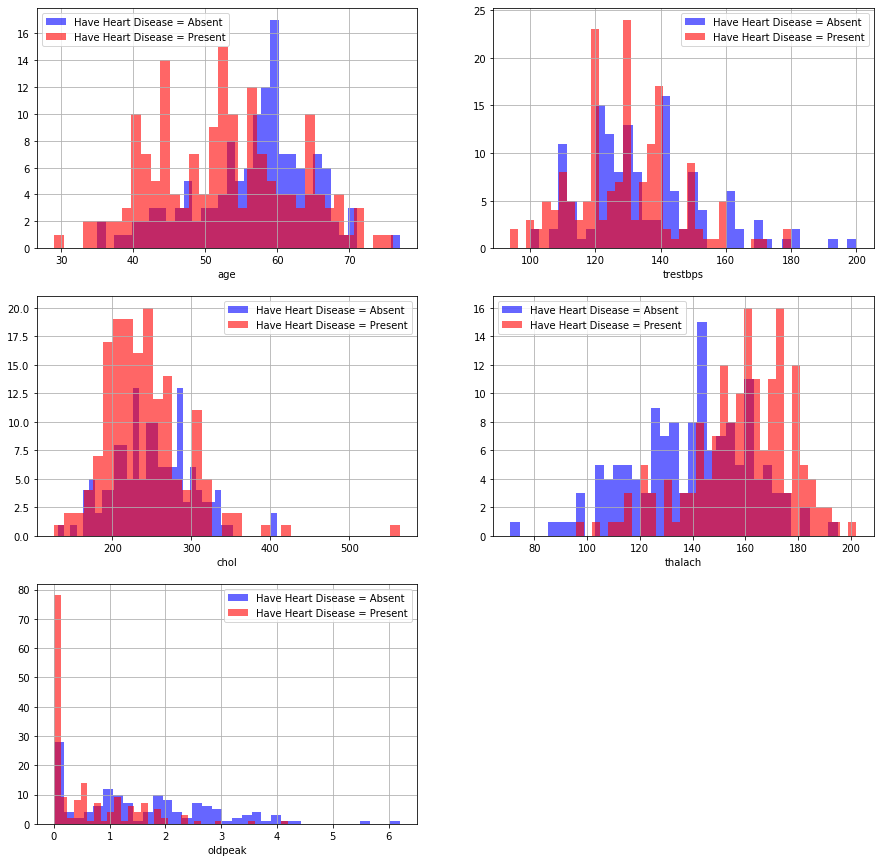

In [8]:
#plotting all the continuous values aganist target
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    data[data["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = Absent', alpha=0.6)
    data[data["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = Present', alpha=0.6)
    plt.legend()
    plt.xlabel(column)


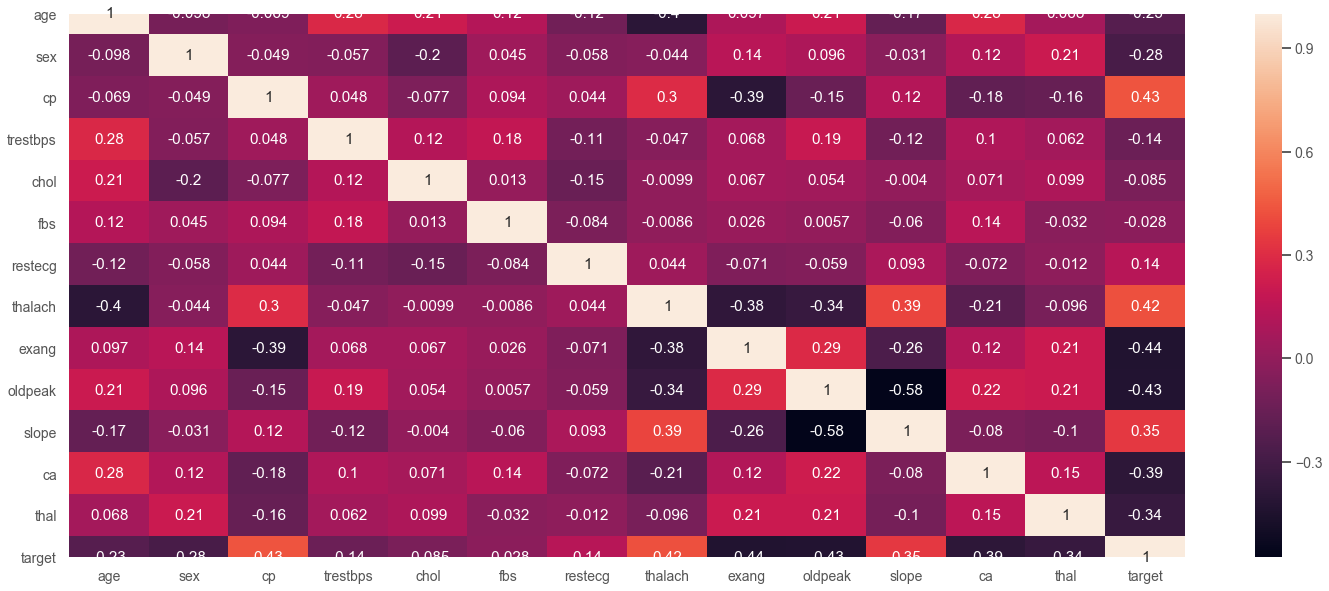

In [9]:
#correlation matrix
sns.set(rc={'figure.figsize':(25,10)})
plt.style.use('ggplot')
sns.set_context("talk", font_scale=0.85)
sns.heatmap(data.loc[:, ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
                           'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']].corr(), 
            annot=True)


In [10]:
#Splitting the age into three categories
data['AgeRange'] = 0
young_index = data[(data.age>=20)&(data.age<40)].index
middle_index = data[(data.age>=40)&(data.age<55)].index
old_index = data[(data.age>=55)].index

In [11]:
#Assinging all the Index with a value
for index in old_index:
    data.loc[index, 'AgeRange'] = 2
    
for index in middle_index:
    data.loc[index, 'AgeRange'] = 1
    
for index in young_index:
    data.loc[index, 'AgeRange'] = 0    

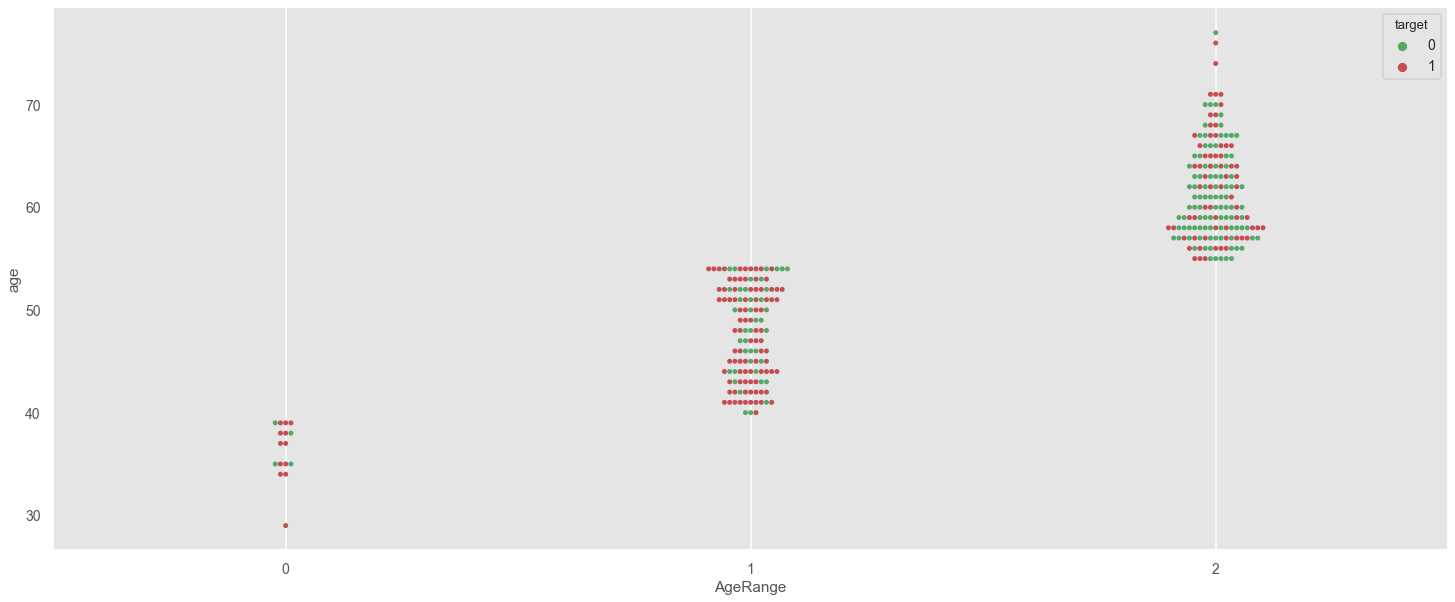

In [12]:
#Swarm Plot for all the Age Ranges
sns.swarmplot(x = 'AgeRange', y = 'age', hue = 'target', palette=["g", "r"], data = data)
plt.grid(b=None)
plt.show()

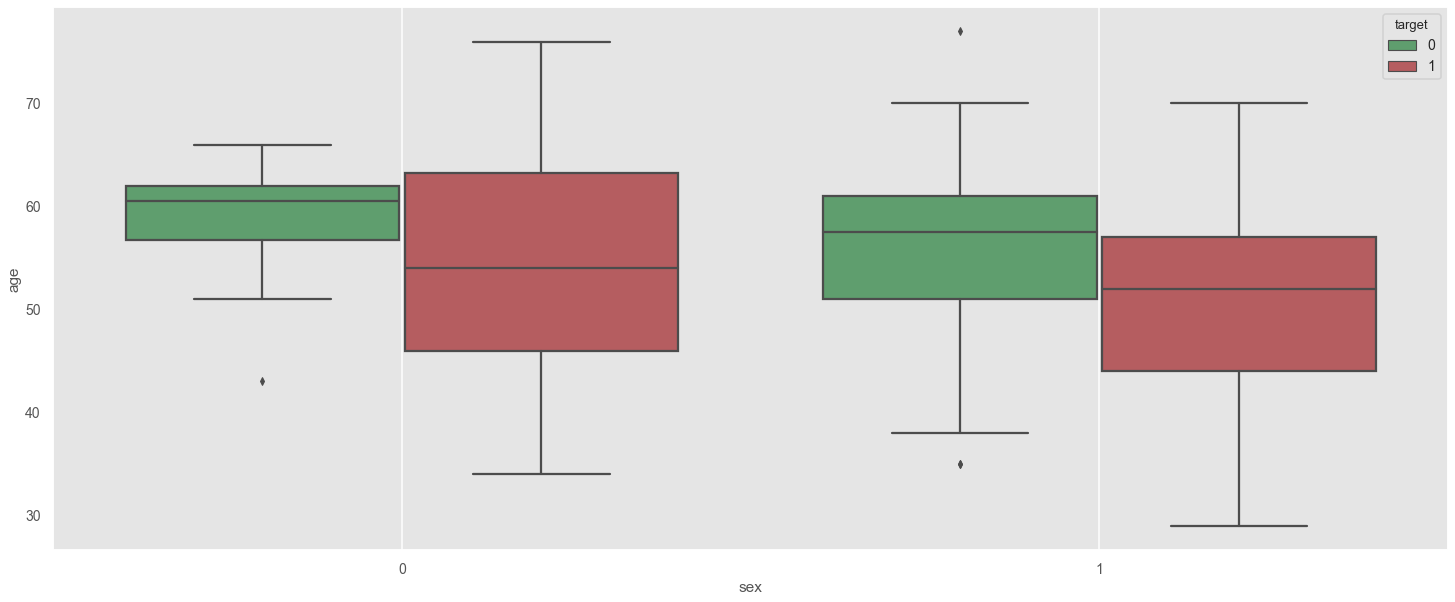

In [13]:
#Box Plot of Sex column aganist Target
sns.boxplot(x = 'sex', y = 'age', hue = 'target', palette=["g", "r"], data = data)
plt.grid(b=None)
plt.show()

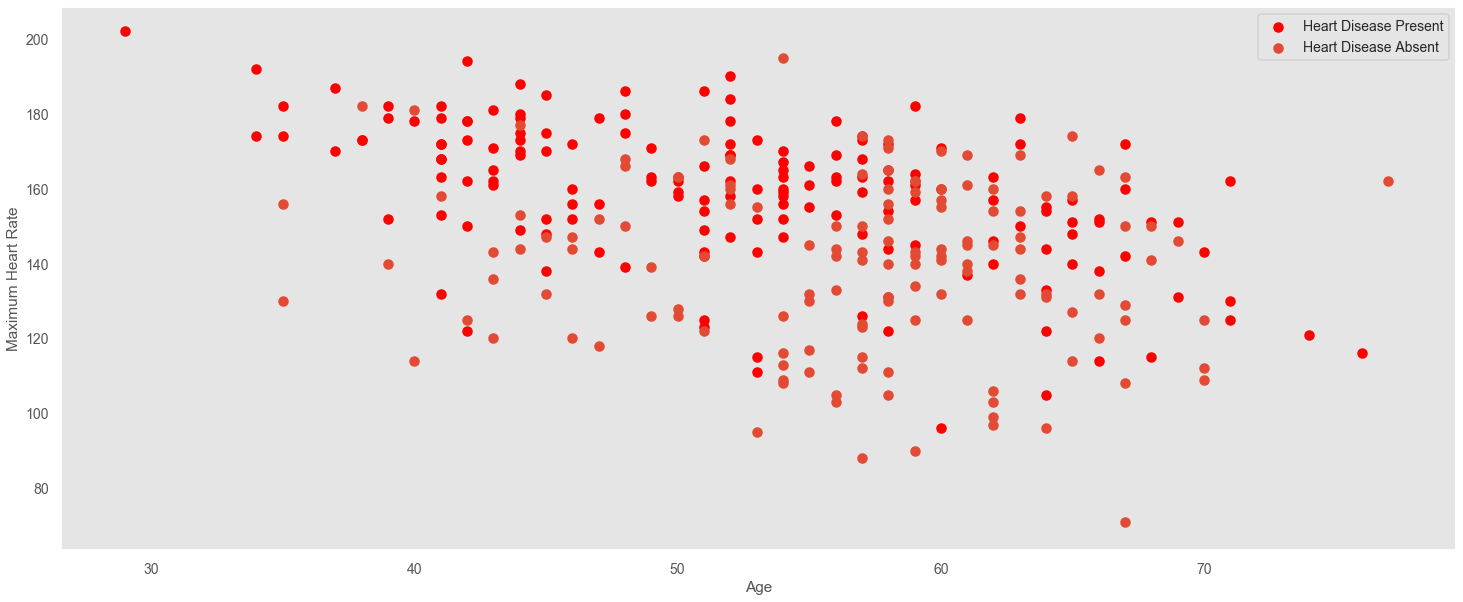

In [14]:
#Scatter Plot of Maximum Heart Rate(Thalach) aganist Target
plt.scatter(x=data.age[data.target==1],y=data.thalach[(data.target==1)],c = 'red')
plt.scatter(x=data.age[data.target==0],y=data.thalach[(data.target==0)])
plt.legend(["Heart Disease Present","Heart Disease Absent"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.grid(b=None)
plt.show()

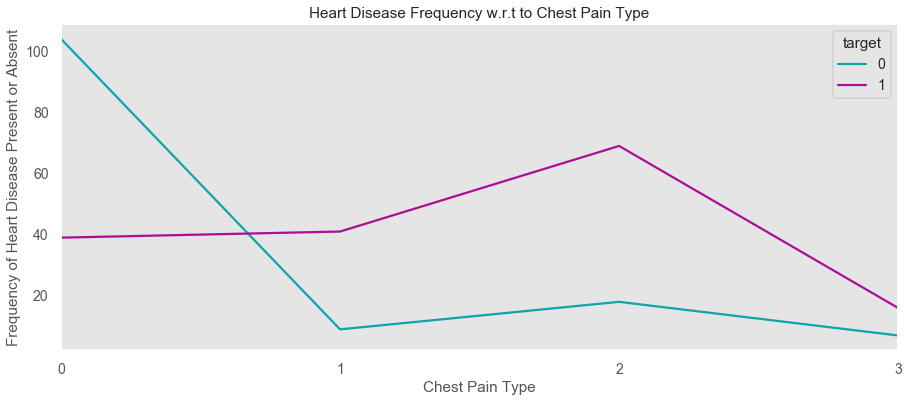

In [15]:
#Plot of Chest Pain aganist Target
pd.crosstab(data.cp,data.target).plot(kind="line",figsize = (15,6),color =['#11A5AA','#AA1198'])
plt.title('Heart Disease Frequency w.r.t to Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks([0,1,2,3])
plt.ylabel('Frequency of Heart Disease Present or Absent')
plt.grid(b=None)
plt.show()

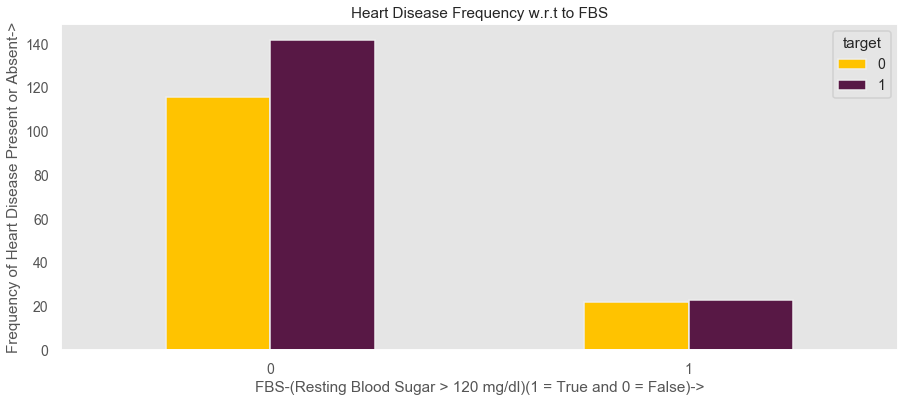

In [16]:
#plot of Fast Blood Sugar aganist Target
pd.crosstab(data.fbs,data.target).plot(kind="bar",figsize = (15,6),color =['#FFC300','#581845'])
plt.title('Heart Disease Frequency w.r.t to FBS')
plt.xlabel('FBS-(Resting Blood Sugar > 120 mg/dl)(1 = True and 0 = False)->')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Heart Disease Present or Absent->')
plt.grid(b=None)
plt.show()

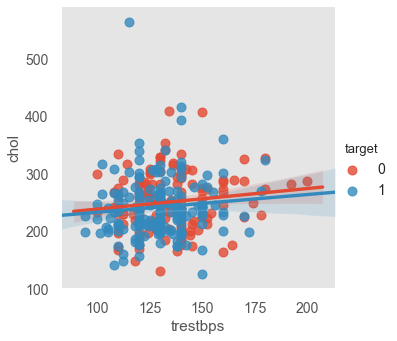

In [17]:
#Plot of Trestbps and cholestrol aganist Target
sns.lmplot(x= 'trestbps' , y = 'chol' , hue = 'target', data = data)
plt.grid(b=None)
plt.show()

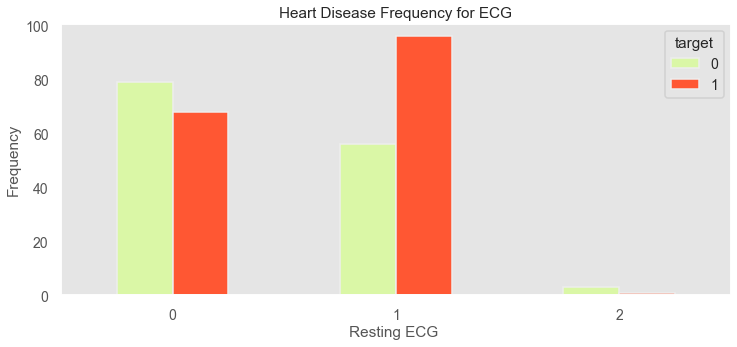

In [18]:
#Bar plot of Resting ECG aganist Target
pd.crosstab(data.restecg,data.target).plot(kind="bar",figsize=(12,5),color=['#DAF7A6','#FF5733'])
plt.title('Heart Disease Frequency for ECG')
plt.xlabel('Resting ECG ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.grid(b=None)
plt.show()

==================== FEATURE AND TARGET SELECTION =============================================

In [19]:
#Divide Feature and Target
X = data.drop(['target'], axis=1)
y = data.target
#iloc[:,:-1];iloc[:,-1]-> Test

============================ DATA SPLIT INTO TEST AND TRAIN ==============================================

In [20]:
#Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

================================ FEATURE SCALING =======================================================================

In [21]:
#Feature Scaling for making all the column values in the same scale
from sklearn.preprocessing import StandardScaler 
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

=====================================================KNN===========================================================

In [22]:
# KNN Model Building 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [23]:
#Prediction and Accuracy calculation
y_pred = classifier.predict(X_test)*100
accuracy_knn = print("{} NN Score: {:.2f}%".format(2, classifier.score(X_test, y_test)*100))

2 NN Score: 85.25%


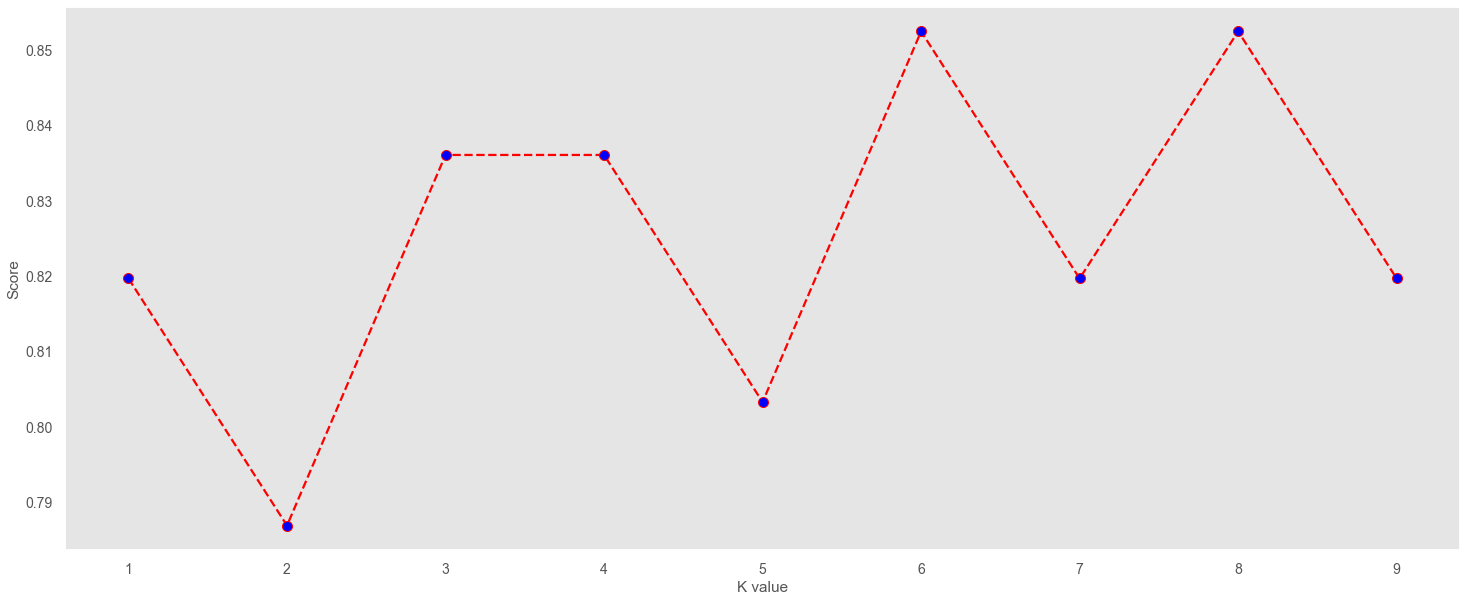

Maximum KNN Score is 85.25%


In [24]:
# try to find best k value
error = []

for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    error.append(knn.score(X_test,y_test))
    
plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.xlabel("K value")
plt.ylabel("Score")
plt.grid(b=None)
plt.show()

acc = max(error)*100
print("Maximum KNN Score is {:.2f}%".format(acc))

In [25]:
#Adding the model with the accuracy in a tabular format
table_KNN = pd.DataFrame(data=[["KNN Classification", acc]], 
                          columns=['Model', 'Testing Accuracy %'])
table_KNN

,Model,Testing Accuracy %
0,KNN Classification,85.245902


========================================== NAIVE BAYES =============================================================

In [26]:
#Naive Bayes algorithm
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [27]:
#Calculate the accuracy of Naive bayes model
from sklearn.metrics import accuracy_score
nb_acc = accuracy_score(y_test, y_pred) 
nb_acc = nb_acc*100

In [28]:
#Adding the model and the accuracy in a table
table_NB = pd.DataFrame(data=[["NAIVE BAYES Classification", nb_acc]], 
                          columns=['Model', 'Testing Accuracy %'])
table_NB = table_NB.append(table_KNN, ignore_index=True)
table_NB

,Model,Testing Accuracy %
0,NAIVE BAYES Classification,83.606557
1,KNN Classification,85.245902


========================== DECISION TREE CLASSIFICATION ==============================================================

In [29]:
#Create Decision Tree Classification model and train the model
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train )

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [30]:
#Predict  the test data 
y_pred_dtc = dtc.predict(X_test)


In [31]:
#Calculate the accuracy of Decision Tree Classification model
dtc_acc = accuracy_score(y_test, y_pred_dtc) 
dtc_acc = dtc_acc*100

In [32]:
#Adding the model and the accuracy in a table
table_dtc = pd.DataFrame(data=[["DECISION TREE Classification", dtc_acc]], 
                          columns=['Model', 'Testing Accuracy %'])
table_dtc = table_dtc.append(table_NB, ignore_index=True)
table_dtc

,Model,Testing Accuracy %
0,DECISION TREE Classification,75.409836
1,NAIVE BAYES Classification,83.606557
2,KNN Classification,85.245902


==========================================LOGISTIC REGRESSION ======================================================

In [33]:
#Logistic Regression Model
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

C:\Users\sindh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
#Prediction and Accuracy calculation
test_score = accuracy_score(y_test, log_reg.predict(X_test)) * 100
test_score

83.60655737704919

In [35]:
#Adding the model and the accuracy in a table
table_logistic = pd.DataFrame(data=[["LOGISTIC REGRESSION", test_score]], 
                          columns=['Model', 'Testing Accuracy %'])
table_logistic = table_logistic.append(table_dtc, ignore_index=True)
table_logistic

,Model,Testing Accuracy %
0,LOGISTIC REGRESSION,83.606557
1,DECISION TREE Classification,75.409836
2,NAIVE BAYES Classification,83.606557
3,KNN Classification,85.245902


============================================== SVM =================================================================

In [36]:
#SVM Model Building
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [37]:
#Prediction and Accuracy calculation
test_score_svm = accuracy_score(y_test, svm_model.predict(X_test)) * 100
test_score_svm

85.24590163934425

In [38]:
#Adding the model and the accuracy in a table
table_svm = pd.DataFrame(data=[["SVM Classification", test_score_svm]], 
                          columns=['Model', 'Testing Accuracy %'])
table_svm = table_svm.append(table_logistic, ignore_index=True)
table_svm

,Model,Testing Accuracy %
0,SVM Classification,85.245902
1,LOGISTIC REGRESSION,83.606557
2,DECISION TREE Classification,75.409836
3,NAIVE BAYES Classification,83.606557
4,KNN Classification,85.245902


================================================= Random Forest ============================================

In [39]:
#Random Forest Model Building
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rand_forest = RandomForestClassifier(n_estimators=1000, random_state=42)
rand_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [40]:
#Prediction and Accuracy calculation
test_score_rf = accuracy_score(y_test, rand_forest.predict(X_test)) * 100
test_score_rf

83.60655737704919

In [41]:
#Adding the model and the accuracy in a table
table_rf = pd.DataFrame(data=[["RANDOM FOREST Classification", test_score_rf]], 
                          columns=['Model', 'Testing Accuracy %'])
table_rf = table_rf.append(table_svm, ignore_index=True)
table_rf

,Model,Testing Accuracy %
0,RANDOM FOREST Classification,83.606557
1,SVM Classification,85.245902
2,LOGISTIC REGRESSION,83.606557
3,DECISION TREE Classification,75.409836
4,NAIVE BAYES Classification,83.606557
5,KNN Classification,85.245902


============================================= XGBoost Classifier =============================================

In [42]:
#XGBoost Model Building 
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [43]:
#Prediction and accuracy calculation
test_score_xgb = accuracy_score(y_test, xgb.predict(X_test)) * 100
test_score_xgb

85.24590163934425

In [46]:
#Adding the model and the accuracy in a table
table_xgb = pd.DataFrame(data=[["XGBoost Classification", test_score_xgb]], 
                          columns=['Model', 'Testing Accuracy %'])
table_xgb = table_xgb.append(table_rf, ignore_index=True)
table_xgb
Final_table = table_xgb

In [45]:
# A tabular comparision of all the models with Accuracy
Final_table

,Model,Testing Accuracy %
0,XGBoost Classification,85.245902
1,RANDOM FOREST Classification,83.606557
2,SVM Classification,85.245902
3,LOGISTIC REGRESSION,83.606557
4,DECISION TREE Classification,75.409836
5,NAIVE BAYES Classification,83.606557
6,KNN Classification,85.245902
